In [95]:
from jax import config
config.update("jax_enable_x64", True)
from pathlib import Path
import glob 

In [96]:
import sheap
from sheap.MainSheap import Sheapectral 
from sheap.Plotting.SheapPlot import SheapPlot
from sheap.Tools.spectra_readers import parallel_reader_safe ,batched_reader

In [97]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [137]:
from sheap.RegionHandler.RegionBuilder import RegionBuilder
from sheap.RegionFitting.RegionFitting import RegionFitting

In [99]:
import yaml

In [ ]:
# with open("/home/favila/smbh_mass/sheap/sheap/RegionHandler/LineRepository/feii_uv.yaml", "r") as f:
#      data = yaml.safe_load(f)

In [103]:
# for entry in data:
#     entry['amplitude'] *= 10

In [104]:
# isinstance(data, list) and all(isinstance(item, dict) for item in data)

In [135]:
regionclass = RegionBuilder(3000,5500,fe_mode="model",group_method=False,n_broad=1)

In [136]:
regionclass.tied_relations

[['center_HeIb_1_broad', 'center_Hbeta_1_broad'],
 ['fwhm_HeIb_1_broad', 'fwhm_Hbeta_1_broad'],
 ['center_HeIIc_1_broad', 'center_Hbeta_1_broad'],
 ['fwhm_HeIIc_1_broad', 'fwhm_Hbeta_1_broad'],
 ['center_Heps_1_broad', 'center_Hbeta_1_broad'],
 ['fwhm_Heps_1_broad', 'fwhm_Hbeta_1_broad'],
 ['center_Hd_1_broad', 'center_Hbeta_1_broad'],
 ['fwhm_Hd_1_broad', 'fwhm_Hbeta_1_broad'],
 ['center_HeIc_1_broad', 'center_Hbeta_1_broad'],
 ['fwhm_HeIc_1_broad', 'fwhm_Hbeta_1_broad'],
 ['center_Hg_1_broad', 'center_Hbeta_1_broad'],
 ['fwhm_Hg_1_broad', 'fwhm_Hbeta_1_broad'],
 ['center_HeId_1_broad', 'center_Hbeta_1_broad'],
 ['fwhm_HeId_1_broad', 'fwhm_Hbeta_1_broad'],
 ['center_HeIId_1_broad', 'center_Hbeta_1_broad'],
 ['fwhm_HeIId_1_broad', 'fwhm_Hbeta_1_broad'],
 ['center_OIIa_1_narrow', 'center_OIIIc_1_narrow'],
 ['fwhm_OIIa_1_narrow', 'fwhm_OIIIc_1_narrow'],
 ['center_OIIb_1_narrow', 'center_OIIIc_1_narrow'],
 ['fwhm_OIIb_1_narrow', 'fwhm_OIIIc_1_narrow'],
 ['center_NeIIIa_1_narrow', 'center_

In [127]:
complex_class = regionclass.complex_class


In [ ]:
#RegionFitting

In [4]:
spectrum_dic = Path(sheap.__file__).resolve().parent / "SuportData" / "Spectrum"
files = glob.glob(f"{spectrum_dic}/*")


- Small example on how to use sheap, first we need to read the spectrums for this we use the function **parallel_reader**

In [5]:
coords,_,spectra = parallel_reader_safe(files) 
z = [0.184366,0.161769]

/home/favila/miniforge3/envs/jax/lib/python3.12/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [7]:
spectra

[array([[3.5925259e+03, 3.5933542e+03, 3.5941809e+03, ..., 1.0329994e+04,
         1.0332376e+04, 1.0334747e+04],
        [6.9013656e-16, 6.5657934e-16, 6.7908410e-16, ..., 2.1508252e-16,
         1.2753591e-16, 6.7899756e-17],
        [7.5231918e-17, 7.4482102e-17, 7.7474232e-17, ..., 2.8026901e-17,
         2.8903785e-17, 3.3745935e-17],
        [1.2268056e+00, 1.2268564e+00, 1.2269044e+00, ..., 9.0056640e-01,
         9.0141994e-01, 9.0225494e-01]], shape=(4, 4590), dtype=float32),
 array([[3.6124351e+03, 3.6132661e+03, 3.6140994e+03, ..., 1.0387235e+04,
         1.0389631e+04, 1.0392016e+04],
        [2.8161190e-15, 3.2063886e-15, 3.1250588e-15, ..., 2.6077778e-16,
         2.8292912e-16, 3.0006997e-16],
        [1.5648926e-16, 1.5831378e-16, 1.5609027e-16, ..., 4.8302232e-17,
         5.2103485e-17, 5.7054750e-17],
        [1.0694764e+00, 1.0696356e+00, 1.0697926e+00, ..., 8.6487919e-01,
         8.6569798e-01, 8.6653018e-01]], shape=(4, 4590), dtype=float32)]

In [8]:
# coords,spectra,_ = parallel_reader([files[0]]) 
# z = [0.161769]

In [9]:
sheapspectral = Sheapectral(spectra,z=z,coords=coords)

extinction correction will be do it, change 'extinction_correction' to done if you want to avoid this step
redshift correction will be do it, change 'redshift_correction' to done if you want to avoid this step


<Axes: xlabel='Wavelength [Å]', ylabel='Flux [arb]'>

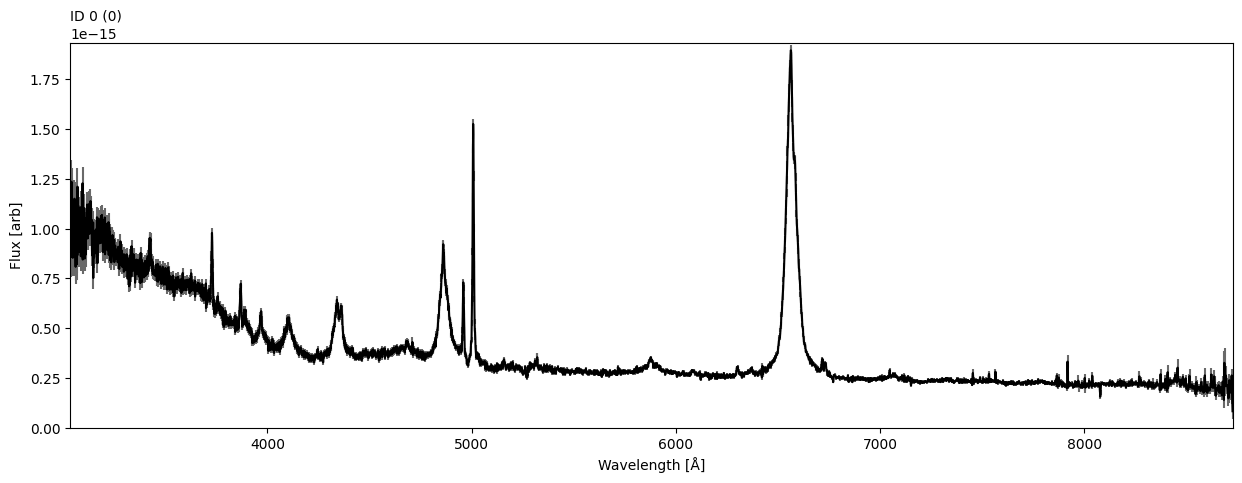

In [9]:
sheapspectral.quicklook(0)

In [36]:
sheapspectral.build_region(3000,7200,n_broad=1,grouped_method=True,fe_mode = "template",continuum_profile="brokenpowerlaw")

added OP template


In [37]:
sheapspectral.fit_region(learning_rate=[1,1e-2],num_steps_list=[100,3000],sigma_params=False)

Fitting 2 spectra with 4590 wavelength pixels

STEP1 (step 1) free params 49
learning_rate: 1 num_steps: 100 non_optimize_in_axis: 4


Time for step 'step1': 13.00 seconds

STEP2 (step 2) free params 49
learning_rate: 0.01 num_steps: 3000 non_optimize_in_axis: 4
Time for step 'step2': 11.84 seconds
The entire process took 24.84 (12.42s by spectra)


In [38]:
sheapspectral.result.params_dict

{'logFWHM_feop_21_fe': 0,
 'shift_feop_21_fe': 1,
 'scale_feop_21_fe': 2,
 'index1_brokenpowerlaw_0_continuum': 3,
 'index2_brokenpowerlaw_0_continuum': 4,
 'scale_brokenpowerlaw_0_continuum': 5,
 'refer_brokenpowerlaw_0_continuum': 6,
 'amplitude0_broad1_1_broad': 7,
 'amplitude1_broad1_1_broad': 8,
 'amplitude2_broad1_1_broad': 9,
 'amplitude3_broad1_1_broad': 10,
 'amplitude4_broad1_1_broad': 11,
 'amplitude5_broad1_1_broad': 12,
 'amplitude6_broad1_1_broad': 13,
 'amplitude7_broad1_1_broad': 14,
 'amplitude8_broad1_1_broad': 15,
 'amplitude9_broad1_1_broad': 16,
 'amplitude10_broad1_1_broad': 17,
 'amplitude11_broad1_1_broad': 18,
 'amplitude12_broad1_1_broad': 19,
 'amplitude13_broad1_1_broad': 20,
 'amplitude14_broad1_1_broad': 21,
 'amplitude15_broad1_1_broad': 22,
 'shift_broad1_1_broad': 23,
 'fwhm_broad1_1_broad': 24,
 'amplitude0_narrow1_1_narrow': 25,
 'amplitude1_narrow1_1_narrow': 26,
 'amplitude2_narrow1_1_narrow': 27,
 'amplitude3_narrow1_1_narrow': 28,
 'amplitude4_nar

In [39]:
sp = SheapPlot(sheapspectral)

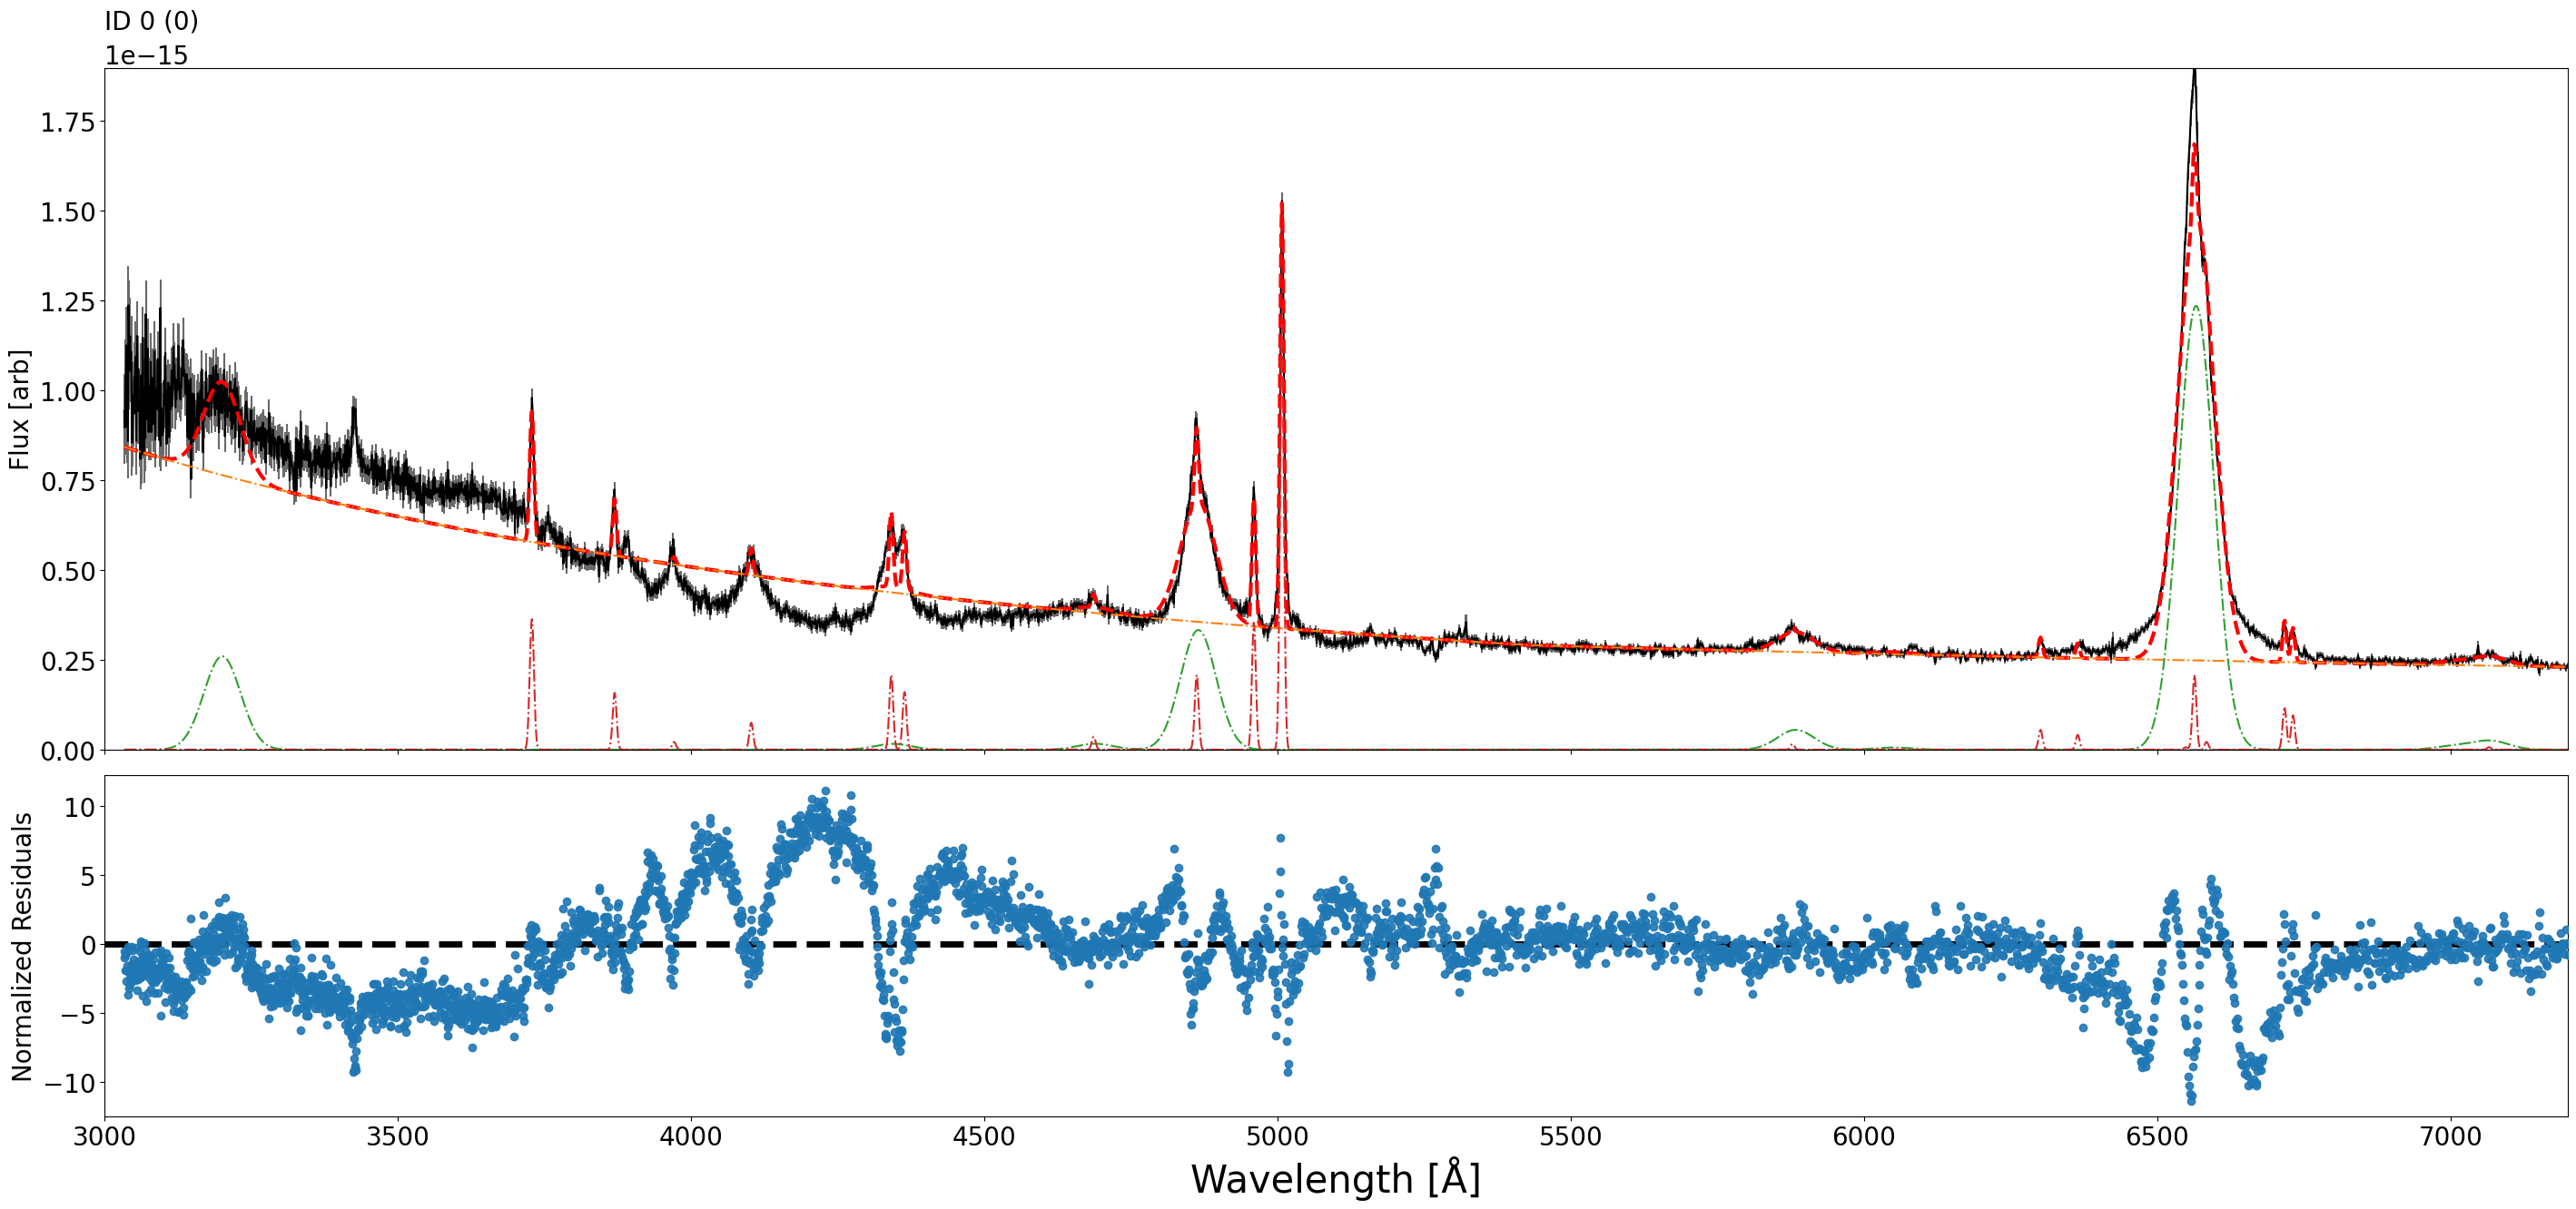

In [41]:
sp.plot(0)

In [ ]:
import matplotlib.pyplot as plt

# extract wavelength and flux for the first object
wavelength = sheapspectral.spectra[0, 0, :]  # pixel wavelengths :contentReference[oaicite:0]{index=0}
flux       = sheapspectral.spectra[0, 1, :]  # corresponding fluxes :contentReference[oaicite:1]{index=1}

plt.figure(figsize=(20, 10))
plt.plot(wavelength, flux, color='black', linewidth=1)

# get current y‐limits so we can place labels at the top
ymin, ymax = plt.ylim()

# overlay each line center
for line in sheapspectral.complex_region:
    center = line.center        # wavelength center of this component :contentReference[oaicite:2]{index=2}
    name   = line.line_name     # human‐readable label :contentReference[oaicite:3]{index=3}

    # skip entries without a defined center
    if center is None:
        continue

    # draw dashed red line
    plt.axvline(center, color='red', linestyle='--', linewidth=0.8)

    # annotate at 98% of the top of the plot, rotated vertical
    plt.text(
        center,
        ymax * 0.98,
        name,
        rotation=90,
        verticalalignment='top',
        horizontalalignment='center',
        fontsize=9,
        color='red'
    )

# final plot cosmetics
plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux [arb]")
plt.title(f"Spectrum ({sheapspectral.names[0]}) with Emission Line Centers")
plt.tight_layout()
plt.show()
